<h1>Analysis of Campaign Donations in the 2012 Presidental Election</h1>

<h3>This notebook visualizes data from the US Federal Election Commision, focusing on donations during the 2012 Presidental Election between Barack Obama and Mitt Romney. This notebook based on <code>fec_handler.py</code> script.</h3>

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Get data from `datasets` folder

In [5]:
data = pd.read_csv('../datasets/fec/fec_dataset.csv', low_memory=False)
data

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001726,C00500587,P20003281,"Perry, Rick","GORMAN, CHRIS D. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,5000.0,29-SEP-11,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,NaN,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,SA17A,751678
1001727,C00500587,P20003281,"Perry, Rick","DUFFY, DAVID A. MR.",INFO REQUESTED,XX,99999,DUFFY EQUIPMENT COMPANY INC.,BUSINESS OWNER,2500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678
1001728,C00500587,P20003281,"Perry, Rick","GRANE, BRYAN F. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,500.0,29-SEP-11,NaN,NaN,NaN,SA17A,751678
1001729,C00500587,P20003281,"Perry, Rick","TOLBERT, DARYL MR.",INFO REQUESTED,XX,99999,T.A.C.C.,LONGWALL MAINTENANCE FOREMAN,500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

Define candidate's affiliation in dictionary

In [8]:
parties_affiliation = {
    "Bachmann, Michelle": "Republican",
    "Cain, Herman": "Republican",
    "Gingrich, Newt": "Republican",
    "Hunstman, Jon": "Republican",
    "Johnson, Gary Earl": "Republican",
    "McCotter, Thadeus G": "Republican",
    "Obama, Barack": "Democrat",
    "Paul, Ron": "Republican",
    "Pawlenty, Timothy": "Republican",
    "Perry, Rick": "Republican",
    "Roemer, Charles E. 'Buddy' III": "Republican",
    "Romney, Mitt": "Republican",
    "Santorum, Rick": "Republican",
}

Add to DataFrame column `party` with candidate's affiliation

In [10]:
data['party'] = data['cand_nm'].map(parties_affiliation)
data

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001726,C00500587,P20003281,"Perry, Rick","GORMAN, CHRIS D. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,5000.0,29-SEP-11,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,NaN,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,SA17A,751678,Republican
1001727,C00500587,P20003281,"Perry, Rick","DUFFY, DAVID A. MR.",INFO REQUESTED,XX,99999,DUFFY EQUIPMENT COMPANY INC.,BUSINESS OWNER,2500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican
1001728,C00500587,P20003281,"Perry, Rick","GRANE, BRYAN F. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,500.0,29-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican
1001729,C00500587,P20003281,"Perry, Rick","TOLBERT, DARYL MR.",INFO REQUESTED,XX,99999,T.A.C.C.,LONGWALL MAINTENANCE FOREMAN,500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican


Dictionary for cleaning occupation values in the DataFrame

In [12]:
occ_mapping = {
    "IFORMATION REQUESTED PER BEST EFFORTS": "NOT PROVIDED",
    "INFORMATION REQUESTED": "NOT PROVIDED",
    "INFROMATION REQUESTED (BEST EFFORTS)": "NOT PROVIDED",
    "C.E.O": "CEO",
}

Clean column in DataFrame with occupation data

In [14]:
data['contbr_occupation'] = data['contbr_occupation'].map(lambda x: occ_mapping.get(x, x))
data

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,NOT PROVIDED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001726,C00500587,P20003281,"Perry, Rick","GORMAN, CHRIS D. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,5000.0,29-SEP-11,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,NaN,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,SA17A,751678,Republican
1001727,C00500587,P20003281,"Perry, Rick","DUFFY, DAVID A. MR.",INFO REQUESTED,XX,99999,DUFFY EQUIPMENT COMPANY INC.,BUSINESS OWNER,2500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican
1001728,C00500587,P20003281,"Perry, Rick","GRANE, BRYAN F. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,500.0,29-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican
1001729,C00500587,P20003281,"Perry, Rick","TOLBERT, DARYL MR.",INFO REQUESTED,XX,99999,T.A.C.C.,LONGWALL MAINTENANCE FOREMAN,500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican


Dictionary for cleaning employment type values in DataFrame

In [16]:
emp_mapping = {
    "INFORMATION REQUESTED PER BEST EFFORTS": "NOT PROVIDED",
    "INFORMATION REQUESTED": "NOT PROVIDED",
    "SELF": "SELF-EMPLOYED",
    "SELF EMPLOYED": "SELF-EMPLOYED",
}

Clean column in DataFrame with employment type data

In [18]:
data['contbr_employer'] = data['contbr_employer'].map(lambda x: emp_mapping.get(x, x))
data

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,NOT PROVIDED,NOT PROVIDED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001726,C00500587,P20003281,"Perry, Rick","GORMAN, CHRIS D. MR.",INFO REQUESTED,XX,99999,NOT PROVIDED,INFORMATION REQUESTED PER BEST EFFORTS,5000.0,29-SEP-11,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,NaN,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,SA17A,751678,Republican
1001727,C00500587,P20003281,"Perry, Rick","DUFFY, DAVID A. MR.",INFO REQUESTED,XX,99999,DUFFY EQUIPMENT COMPANY INC.,BUSINESS OWNER,2500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican
1001728,C00500587,P20003281,"Perry, Rick","GRANE, BRYAN F. MR.",INFO REQUESTED,XX,99999,NOT PROVIDED,INFORMATION REQUESTED PER BEST EFFORTS,500.0,29-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican
1001729,C00500587,P20003281,"Perry, Rick","TOLBERT, DARYL MR.",INFO REQUESTED,XX,99999,T.A.C.C.,LONGWALL MAINTENANCE FOREMAN,500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican


Create pivot table with all donations amount by occupation

In [20]:
occupation_donations = pd.pivot_table(
    data,
    values='contb_receipt_amt',
    index='contbr_occupation',
    columns='party',
    aggfunc='sum',
    dropna=True,
    fill_value=0,
)

Filter all donations table by values increase 1 million USD

In [22]:
occupation_donations = occupation_donations[occupation_donations.sum(axis=1) > 1000000]
occupation_donations

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11126932.97,7199540.83
BANKER,224084.40,1205468.73
BUSINESS OWNER,449979.30,1268157.43
C.E.O.,1690.00,2387478.11
CEO,2070784.79,1484378.41
CHAIRMAN,495547.00,1151548.37
CONSULTANT,2459812.71,2431060.27
ENGINEER,950425.55,1772861.88
EXECUTIVE,1355161.05,3833601.85


Plotting total donations by parties for different occupation types

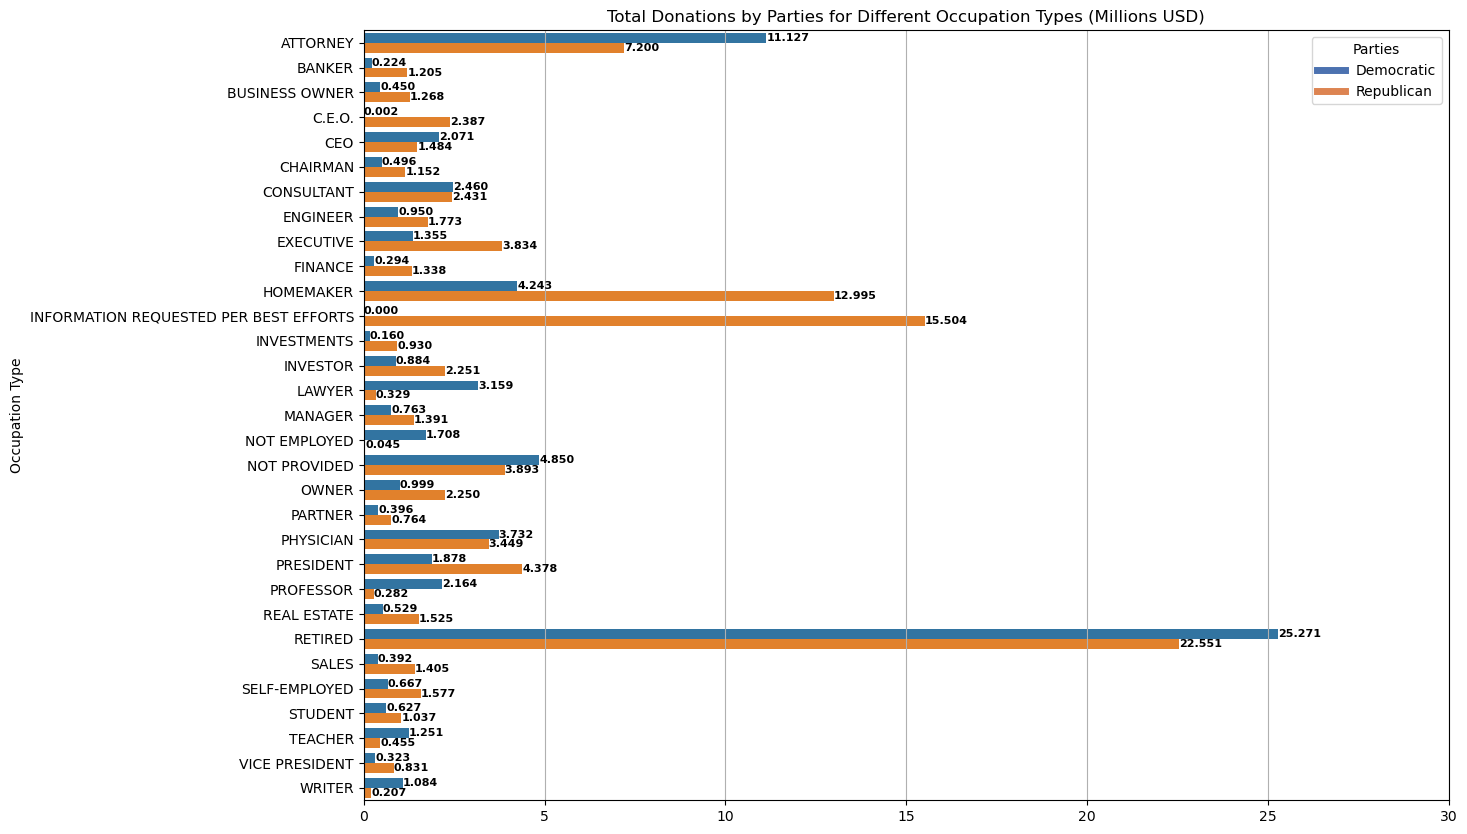

In [24]:
plt.figure(figsize=(14, 10))

# Divide donation amount to get millions number
occupation_donations = occupation_donations / 1000000

# Rearrange data for plotting
occupation_donations = occupation_donations.stack()
occupation_donations.name = 'value'
occupation_donations = occupation_donations.reset_index()

sns.barplot(
    x='value',
    y='contbr_occupation',
    hue='party',
    data=occupation_donations,
)

# Add value as plot label
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.3f', fontsize=8, fontweight='bold')

plt.ylabel("Occupation Type")
plt.xlabel(None)
plt.xticks(range(0, 31, 5))
plt.xlim(0, 30)
plt.title("Total Donations by Parties for Different Occupation Types (Millions USD)")

# Create custom legend handles with the correct colors
plt.legend(
    title="Parties",
    labels=["Democratic", "Republican"],
    handles=[
        plt.Line2D(xdata=[0], ydata=[0], color=sns.color_palette('deep')[i], lw=5) for i in range(2)
    ],
)
plt.grid(axis='x')
plt.show()

United States of America codes

In [26]:
usa_codes = [
    "AL",
    "AK",
    "AZ",
    "AR",
    "CA",
    "CO",
    "CT",
    "DE",
    "FL",
    "GA",
    "HI",
    "ID",
    "IL",
    "IN",
    "IA",
    "KS",
    "KY",
    "LA",
    "ME",
    "MD",
    "MA",
    "MI",
    "MN",
    "MS",
    "MO",
    "MT",
    "NE",
    "NV",
    "NH",
    "NJ",
    "NM",
    "NY",
    "NC",
    "ND",
    "OH",
    "OK",
    "OR",
    "PA",
    "RI",
    "SC",
    "SD",
    "TN",
    "TX",
    "UT",
    "VT",
    "VA",
    "WA",
    "WV",
    "WI",
    "WY",
]

Filter data by main candidates and states

In [28]:
data = data.loc[
    (data['contbr_st'].isin(usa_codes)) & data['cand_nm'].isin(["Obama, Barack", "Romney, Mitt"])
]
data

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
429,C00431171,P80003353,"Romney, Mitt","DICKSON, ROBERT J. MR.",ANCHORAGE,AK,995166129,ATKINSON CONWAY & GOGVOR,ATTORNEY,250.0,27-APR-12,NaN,NaN,NaN,SA17A,785689,Republican
430,C00431171,P80003353,"Romney, Mitt","CARROLL, ART MR.",FAIRBANKS,AK,997014014,RETIRED,RETIRED,100.0,09-APR-12,NaN,NaN,NaN,SA17A,785689,Republican
431,C00431171,P80003353,"Romney, Mitt","NELDNER, RICHARD E. MR.",FAIRBANKS,AK,997072527,RETIRED,RETIRED,2500.0,23-APR-12,NaN,NaN,NaN,SA17A,785689,Republican
432,C00431171,P80003353,"Romney, Mitt","MCGUIRE, PATTI S. MRS.",ANCHORAGE,AK,995021865,BRIDGECARE HOSPITALS,VICE PRESIDENT,1000.0,12-APR-12,NaN,NaN,NaN,SA17A,785689,Republican
433,C00431171,P80003353,"Romney, Mitt","WENZELL, DOMINIC S. DR.",ANCHORAGE,AK,995173342,SELF-EMPLOYED,DENTIST,250.0,30-APR-12,NaN,NaN,NaN,SA17A,785689,Republican
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701366,C00431445,P80003338,"Obama, Barack","HAGEN, MARTIN",JACKSON,WY,83002,TETON COUNTY SCHOOL DIST. #1,BUS DRIVER,19.0,26-APR-12,NaN,NaN,NaN,SA17A,785239,Democrat
701367,C00431445,P80003338,"Obama, Barack","EMORY, DENNIS S",WILSON,WY,830140190,SELF-EMPLOYED,CONSULTANT,100.0,19-APR-12,NaN,NaN,NaN,SA17A,785239,Democrat
701368,C00431445,P80003338,"Obama, Barack","IRWIN, C. DON",DOUGLAS,WY,826339515,NOT PROVIDED,NOT PROVIDED,150.0,05-APR-12,NaN,NaN,NaN,SA17A,785239,Democrat
701369,C00431445,P80003338,"Obama, Barack","LIU, FREDERICK",JACKSON,WY,830010788,NOT EMPLOYED,RETIRED,56.0,26-APR-12,NaN,NaN,NaN,SA17A,785239,Democrat


Calculate the total donations by state and candidate

In [30]:
donations_by_state = pd.pivot_table(
    data,
    values='contb_receipt_amt',
    index='contbr_st',
    columns='cand_nm',
    aggfunc='sum',
    dropna=True,
    fill_value=0,
)
donations_by_state

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,275353.15,86204.24
AL,537835.48,504882.08
AR,324802.28,105351.50
AZ,1484241.84,1850484.23
CA,23370680.84,10908232.46
CO,2104551.38,1477810.82
CT,2037216.66,3377421.85
DE,325394.14,81404.00
FL,7138932.52,8008067.40


Filter donations by state to get states where Barack Obama donations exceeded Romney Mitt 

In [32]:
# Get only states codes as list
obama_states = donations_by_state[
    donations_by_state["Obama, Barack"] > donations_by_state["Romney, Mitt"]
].index.tolist()

Filter donations by state to get states where Romney Mitt donations exceeded Barack Obama

In [34]:
# Get only states codes as list
romney_states = donations_by_state[
    donations_by_state["Romney, Mitt"] > donations_by_state["Obama, Barack"]
].index.tolist()

Plotting USA map colored by candidate's top donations

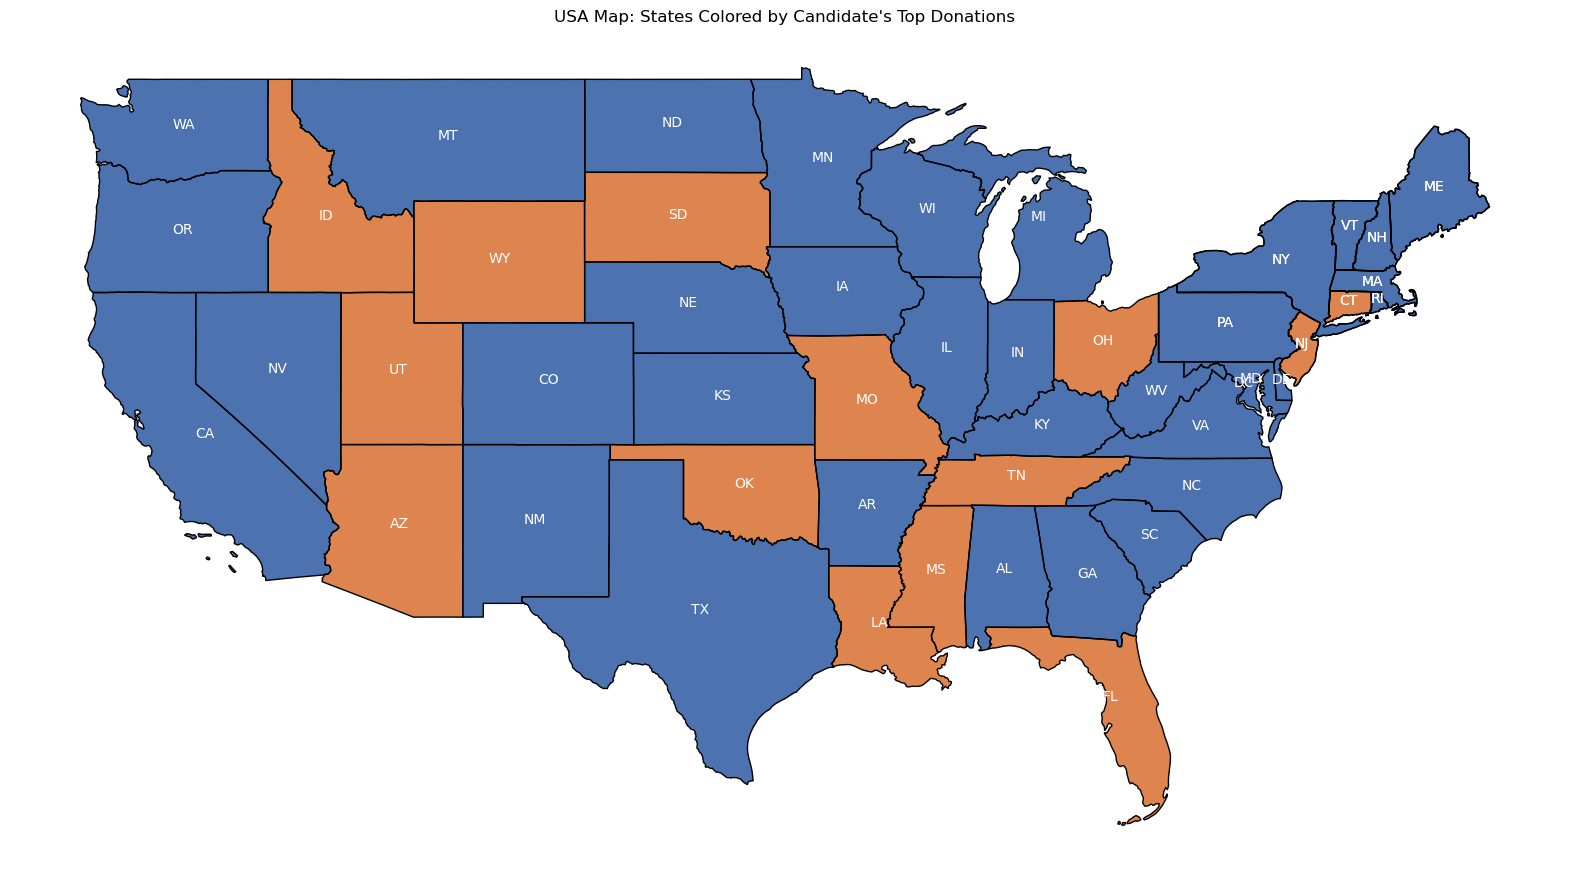

In [36]:
fig, ax = plt.subplots(figsize=(20, 15))

# Load USA boundaries data
states_map_data = gpd.read_file('./geopandas_data/usa-states-census-2014.shp')

# Create a Geopandas USA map
states_map = states_map_data.boundary.plot(ax=ax, linewidth=1, color='black')

# Add USA codes to map
states_map_data.apply(
    lambda x: plt.annotate(
        text=x.STUSPS,
        xy=x.geometry.centroid.coords[0],
        ha='center',
        fontsize=10,
        color='white',
    ),
    axis=1,
)

# Highlight Obama's and Romney's states
obamas_map = states_map_data[states_map_data['STUSPS'].isin(obama_states)]
romneys_map = states_map_data[states_map_data['STUSPS'].isin(romney_states)]

obamas_map.plot(ax=ax, color='#4C72B0')  # Obama's states in blue
romneys_map.plot(ax=ax, color='#DE844E')  # Romney's states in orange

plt.title("USA Map: States Colored by Candidate's Top Donations")
plt.axis('off')
plt.show()

Plotting candidate donations amount by state

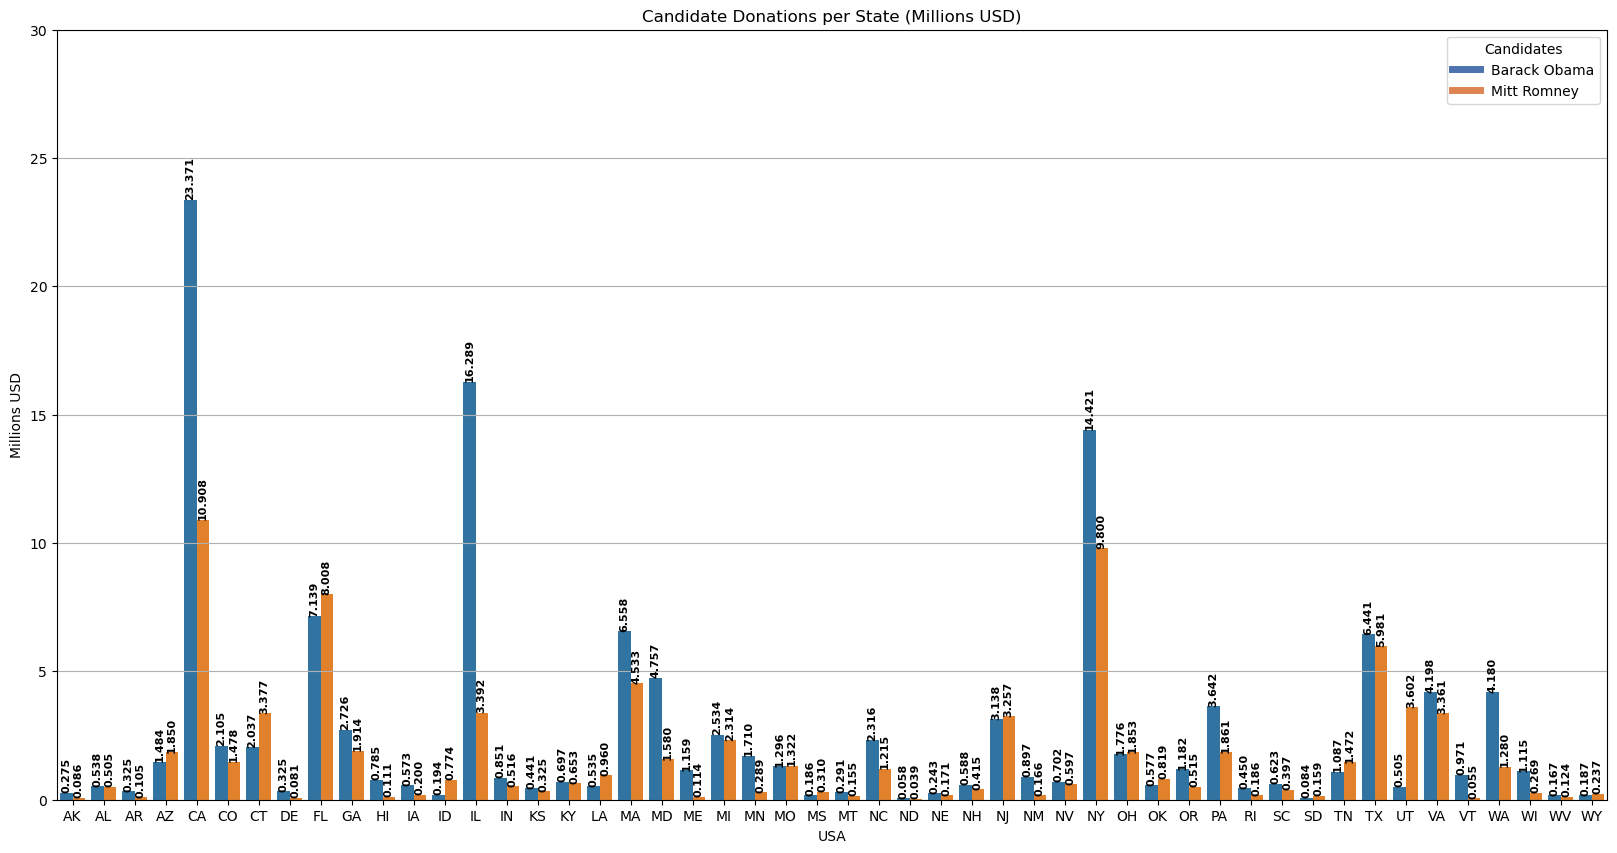

In [38]:
plt.figure(figsize=(20, 10))

# Divide donations to get millions number
donations_by_state = donations_by_state / 1000000

# Rearrange data for plotting
donations_by_state = donations_by_state.stack()
donations_by_state.name = 'value'
donations_by_state = donations_by_state.reset_index()

sns.barplot(
    x='contbr_st',
    y='value',
    hue='cand_nm',
    data=donations_by_state,
)

# Add donation amount as plot label
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.3f', fontsize=8, rotation=90, fontweight='bold')

plt.xlabel("USA")
plt.ylabel("Millions USD")
plt.ylim(0, 30)
plt.yticks(range(0, 31, 5))
plt.title("Candidate Donations per State (Millions USD)")

# Create custom legend handles with the correct colors
plt.legend(
    title="Candidates",
    labels=["Barack Obama", "Mitt Romney"],
    handles=[
        plt.Line2D(xdata=[0], ydata=[0], color=sns.color_palette('deep')[i], lw=5) for i in range(2)
    ],
)
plt.grid(axis='y')
plt.show()